In [1]:
# importing pandas module for analysis
import pandas as pd

In [2]:
# loading required csv files or data
titanic = pd.read_csv('E:\\software\\files\\titanic\\gender_submission.csv')
train = pd.read_csv('E:\\software\\files\\titanic\\train.csv')
test = pd.read_csv('E:\\software\\files\\titanic\\test.csv')

In [3]:
train.info() # taking some info from data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
# showing maximun columns and rows inthe notebook

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [7]:
import seaborn as sns # importing seaborn for data visualisation

In [8]:
import matplotlib.pyplot as plt # matplotlib for data visualisation also

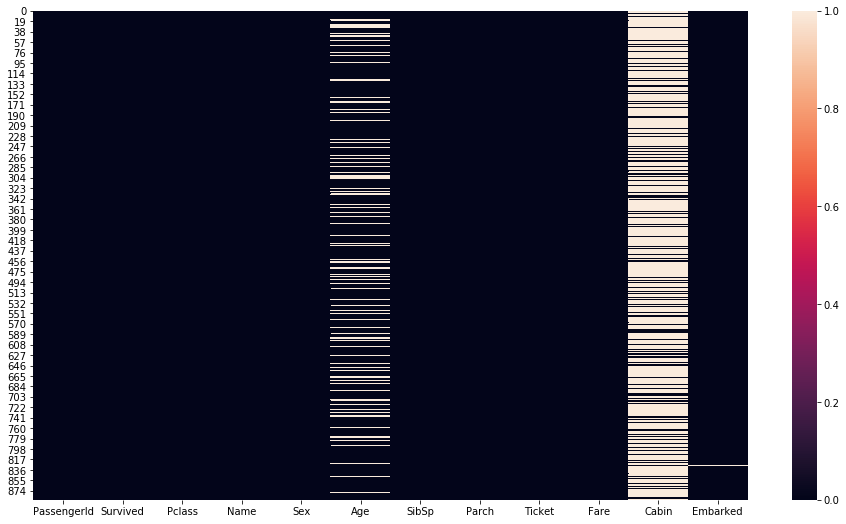

In [9]:
plt.figure(figsize=(16,9))   # to raise the figure size 
sns.heatmap(train.isnull()) # generating heat map 

In [10]:
train.isnull().sum()   #checking null values count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# calculating percentage of missing data
prec_var = train.isnull().sum() / train.shape[0] * 100
prec_var

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
# removing column having missing value more than 19%
null_var = prec_var[prec_var > 19].keys()
null_var
        
    

Index(['Age', 'Cabin'], dtype='object')

In [13]:
drop_col = train.drop(columns= null_var) # dropped unnecessary data from columns or data missed columns

In [14]:
drop_col.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
drop_row_clean = drop_col.dropna(axis= 0) # dropped rows having missed data

In [16]:
drop_row_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

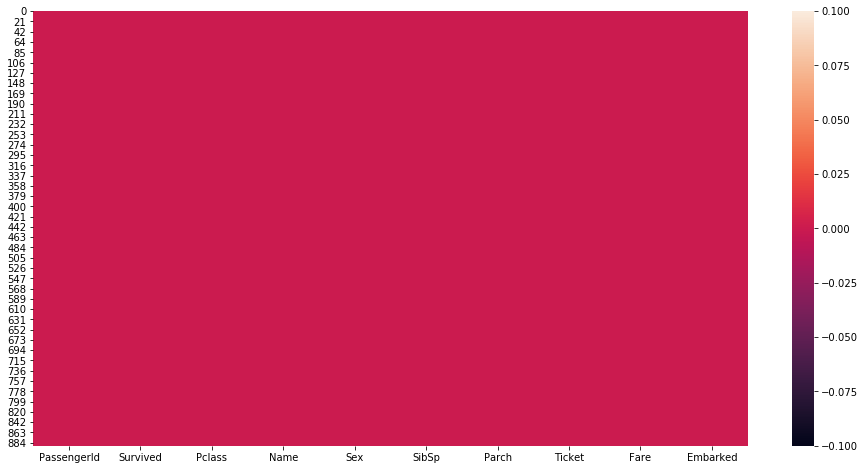

In [17]:
plt.figure(figsize=(16,8))
sns.heatmap(drop_row_clean.isnull())

In [18]:
cleaned_data = drop_row_clean.copy() # changed the variable name here by making copy of older data frame
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 62.5+ KB


In [19]:
# cleaned_data.head(910)

In [37]:
train_data = cleaned_data.drop(labels=['Survived',"Name","Ticket",'Embarked','Sex'], axis=1)
label_data = cleaned_data.iloc[:887,1:2]

sex = cleaned_data.iloc[:,4]

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
sex_col = encode.fit_transform(sex)

sex_col = pd.DataFrame(sex_col, columns=['Sex'] )
sex_col.count()

Sex    889
dtype: int64

In [38]:
train_data.shape

(889, 5)

In [39]:
sex_col.shape

(889, 1)

In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    889 non-null int64
Pclass         889 non-null int64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
dtypes: float64(1), int64(4)
memory usage: 73.7 KB


In [41]:
sex_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 1 columns):
Sex    889 non-null int32
dtypes: int32(1)
memory usage: 3.5 KB


In [42]:
# sex_col.tail(200)

In [43]:
label_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 888
Data columns (total 1 columns):
Survived    887 non-null int64
dtypes: int64(1)
memory usage: 13.9 KB


In [44]:

main_train = pd.concat([train_data,sex_col],axis=1, join ='inner')
main_train

,PassengerId,Pclass,SibSp,Parch,Fare,Sex
0,1,3,1,0,7.2500,1
1,2,1,1,0,71.2833,0
2,3,3,0,0,7.9250,0
3,4,1,1,0,53.1000,0
4,5,3,0,0,8.0500,1
5,6,3,0,0,8.4583,1
6,7,1,0,0,51.8625,1
7,8,3,3,1,21.0750,1
8,9,3,0,2,11.1333,0
9,10,2,1,0,30.0708,0


In [45]:
main_train.shape

(887, 6)

In [46]:
label_data[:887].shape

(887, 1)

# building model here

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
D_class = GaussianNB()
D_class.fit(main_train,label_data)

C:\Users\Anshul Pratap\AppData\Roaming\Python\Python37\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [106]:
# cleaning training data

In [107]:
test_prec = train.isnull().sum() / test.shape[0] * 100
test_prec

PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age             42.344498
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin          164.354067
Embarked         0.478469
dtype: float64

In [108]:
nulltest_var = test_prec[test_prec > 19].keys()
nulltest_var

Index(['Age', 'Cabin'], dtype='object')

In [109]:
drop_col_test = test.drop(columns= null_var)

In [110]:
drop_row_test = drop_col_test.dropna(axis= 0)

In [111]:
drop_row_test

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,2,0,A/4 48871,24.1500,S


In [112]:
test_data = drop_row_test.drop(labels=["Name","Ticket",'Embarked','Sex'], axis=1)
main_test = pd.concat([test_data,sex_col],axis=1).dropna()


In [113]:
# prediction

In [132]:
prediction = D_class.predict(main_test[:100])

In [133]:
org = titanic['Survived'].iloc[:100]


In [134]:

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(org,prediction)

In [135]:
mat

array([[45, 16],
       [26, 13]], dtype=int64)

In [136]:
accuracy = (mat[0,0] + mat[1,1]) / mat.sum()
print(f"model Accuracy: {accuracy}" + '%')

model Accuracy: 0.58%
